CAR INSURANCE DATASET (REGONET 1)

In [2]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\hp\Documents\automobile_dataset (regonet 1).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [5]:
df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

In [6]:
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [7]:
# Get all object type columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Loop through each categorical column and print the unique values
for col in categorical_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 50)  # Separator for clarity

Unique values in column 'fuel-system':
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
--------------------------------------------------
Unique values in column 'engine-type':
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
--------------------------------------------------
Unique values in column 'engine-location':
['front' 'rear']
--------------------------------------------------
Unique values in column 'drive-wheels':
['rwd' 'fwd' '4wd']
--------------------------------------------------
Unique values in column 'body-style':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
--------------------------------------------------
Unique values in column 'aspiration':
['std' 'turbo']
--------------------------------------------------
Unique values in column 'fuel-type':
['gas' 'diesel']
--------------------------------------------------
Unique values in column 'make':
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 

DATA CLEANING 

In [9]:
# Identify all categorical (object/string) columns
cat_cols = df.select_dtypes(include='object').columns

# Strip leading/trailing spaces from all values in those columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())


In [10]:
df['price'] = df['price'].replace('?', np.nan).astype(float)
df['price'].fillna(df['price'].median(), inplace=True)

df['peak-rpm'] = df['peak-rpm'].replace('?', np.nan).astype(float)
df['peak-rpm'].fillna(df['peak-rpm'].median(), inplace=True)

df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

df['stroke'] = df['stroke'].replace('?', np.nan).astype(float)
df['stroke'].fillna(df['stroke'].median(), inplace=True)

df['bore'] = df['bore'].replace('?', np.nan).astype(float)
df['bore'].fillna(df['bore'].median(), inplace=True)

df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

df['normalized-losses'] = df.groupby('make')['normalized-losses'].transform(
    lambda x: x.fillna(x.median()))

df['normalized-losses'] = df.groupby('body-style')['normalized-losses'].transform(
    lambda x: x.fillna(x.median()))

C:\Users\hp\AppData\Local\Temp\ipykernel_14592\390671273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14592\390671273.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

ANALYSIS

Which car features are most associated with higher normalized losses?

normalized-losses    1.000000
horsepower           0.375946
price                0.273411
engine-size          0.223756
curb-weight          0.205660
Name: normalized-losses, dtype: float64


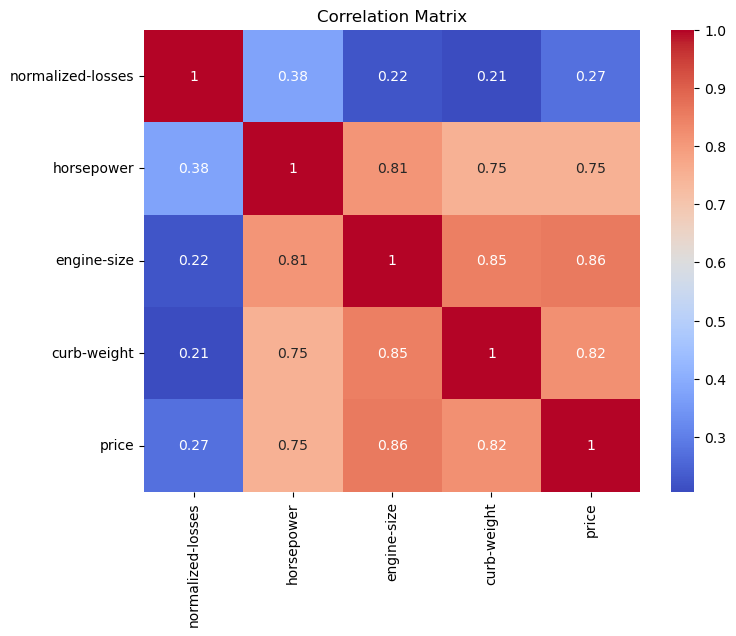

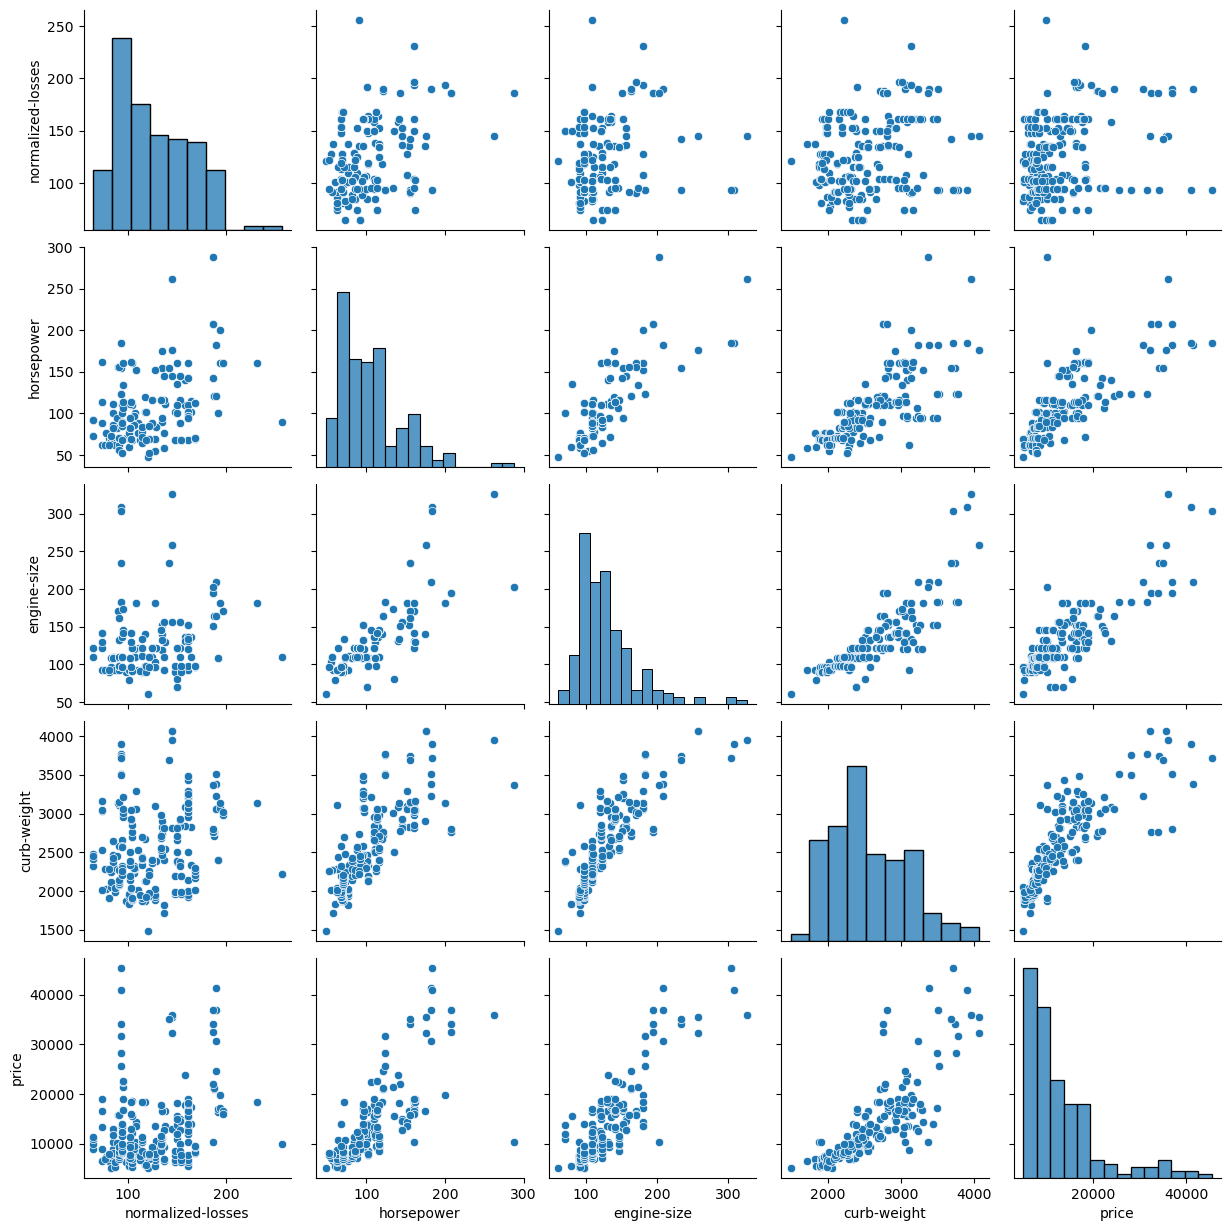

In [14]:
# Select relevant columns
cols = ['normalized-losses', 'horsepower', 'engine-size', 'curb-weight', 'price']

# Check correlation matrix
corr_matrix = df[cols].corr()
print(corr_matrix['normalized-losses'].sort_values(ascending=False))

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to see scatterplots and distributions
sns.pairplot(df[cols])
plt.show()


Are specific car makes linked to higher insurance losses?

make
bmw              190.000000
porsche          186.000000
peugot           161.000000
audi             161.000000
mitsubishi       147.769231
jaguar           145.000000
alfa-romero      137.083333
mercury          135.250000
nissan           135.166667
dodge            133.444444
plymouth         130.071429
saab             127.000000
mazda            122.882353
isuzu            120.062500
renault          113.125000
volkswagen       112.166667
toyota           109.687500
honda            103.000000
chevrolet        100.000000
mercedes-benz     99.125000
subaru            92.250000
volvo             91.454545
Name: normalized-losses, dtype: float64


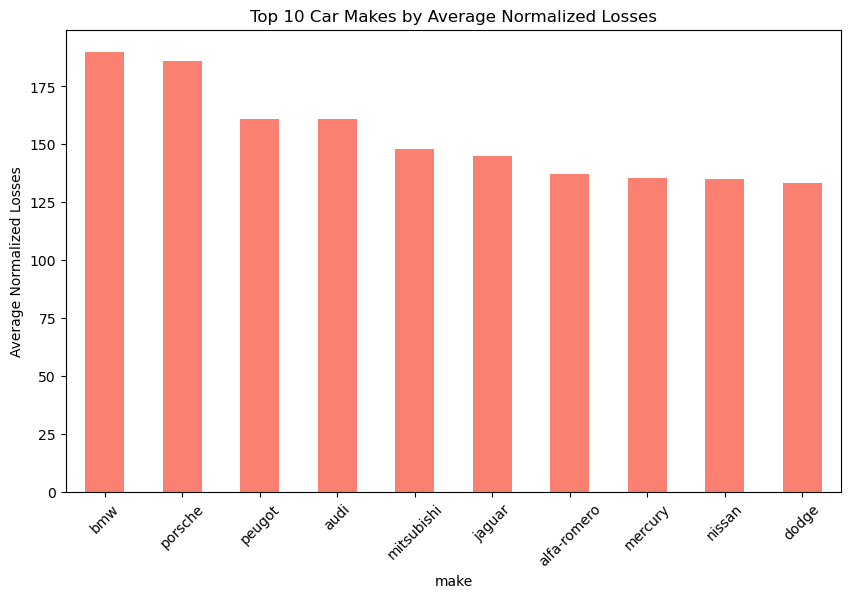

In [16]:
# Group by make and calculate mean normalized losses
avg_losses_by_make = df.groupby('make')['normalized-losses'].mean().sort_values(ascending=False)

# Display the average normalized losses per make
print(avg_losses_by_make)

# Optional: Visualize the top 10 brands with highest average losses
import matplotlib.pyplot as plt

top_10 = avg_losses_by_make.head(10)
top_10.plot(kind='bar', figsize=(10,6), color='salmon')
plt.ylabel('Average Normalized Losses')
plt.title('Top 10 Car Makes by Average Normalized Losses')
plt.xticks(rotation=45)
plt.show()


How does body style impact insurance losses?

body-style
hardtop        141.000000
convertible    138.666667
hatchback      134.407143
sedan          123.083333
wagon          102.760000
Name: normalized-losses, dtype: float64


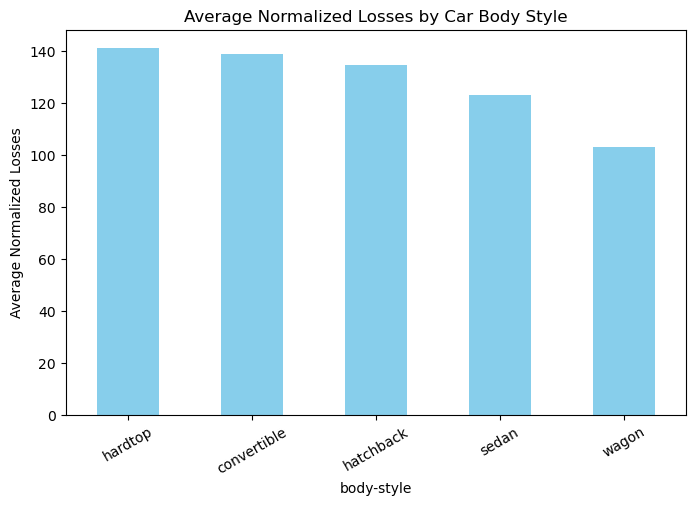

In [26]:
# Group by body-style and calculate average normalized losses
avg_losses_by_body = df.groupby('body-style')['normalized-losses'].mean().sort_values(ascending=False)

# Print the average normalized losses per body style
print(avg_losses_by_body)

# Visualize with a bar chart
avg_losses_by_body.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.ylabel('Average Normalized Losses')
plt.title('Average Normalized Losses by Car Body Style')
plt.xticks(rotation=30)
plt.show()


What is the relationship between fuel type and insurance losses?

fuel-type
diesel    114.050000
gas       126.878378
Name: normalized-losses, dtype: float64


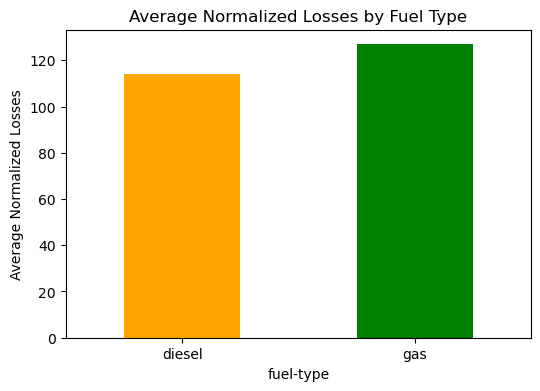

In [28]:
# Group by fuel-type and calculate average normalized losses
avg_losses_by_fuel = df.groupby('fuel-type')['normalized-losses'].mean()

# Print the average normalized losses by fuel type
print(avg_losses_by_fuel)

# Visualize the comparison with a bar chart
avg_losses_by_fuel.plot(kind='bar', color=['orange', 'green'], figsize=(6,4))
plt.ylabel('Average Normalized Losses')
plt.title('Average Normalized Losses by Fuel Type')
plt.xticks(rotation=0)
plt.show()


Does the number of doors affect insurance risk?

num-of-doors
2.0    141.106742
4.0    113.750000
Name: normalized-losses, dtype: float64


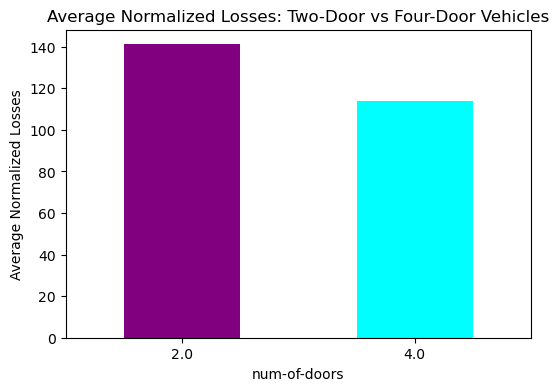

In [30]:
# Make sure 'num-of-doors' is numeric (float)
df['num-of-doors'] = pd.to_numeric(df['num-of-doors'], errors='coerce')

# Filter using floats
doors_filtered = df[df['num-of-doors'].isin([2.0, 4.0])].copy()

# Convert 'normalized-losses' to numeric and drop NaNs
doors_filtered['normalized-losses'] = pd.to_numeric(doors_filtered['normalized-losses'], errors='coerce')
doors_filtered = doors_filtered.dropna(subset=['normalized-losses'])

# Group and analyze
avg_losses_by_doors = doors_filtered.groupby('num-of-doors')['normalized-losses'].mean()

print(avg_losses_by_doors)

# Plot results
avg_losses_by_doors.plot(kind='bar', color=['purple', 'cyan'], figsize=(6,4))
plt.ylabel('Average Normalized Losses')
plt.title('Average Normalized Losses: Two-Door vs Four-Door Vehicles')
plt.xticks(rotation=0)
plt.show()


Which numerical features have the strongest correlation with normalized losses

In [32]:
#ensure relevant columns are numeric and handle missing values
cols = ['normalized-losses', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']

# Convert columns to numeric, coercing errors to NaN
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in these columns to have clean correlation calculation
clean_df = df.dropna(subset=cols)

# Calculate correlation matrix for these columns
corr_matrix = clean_df[cols].corr()

# Print correlation of normalized-losses with the others
print(corr_matrix['normalized-losses'].sort_values(ascending=False))


normalized-losses    1.000000
horsepower           0.375946
engine-size          0.223756
highway-mpg         -0.273456
city-mpg            -0.327853
Name: normalized-losses, dtype: float64


Are there nonlinear relationships between features and insurance losses?

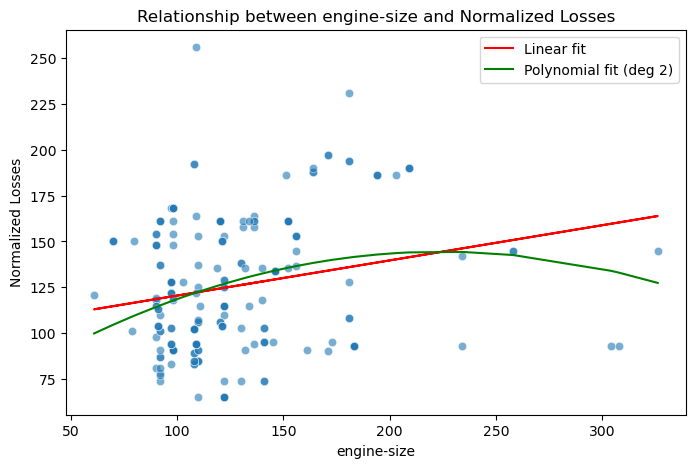

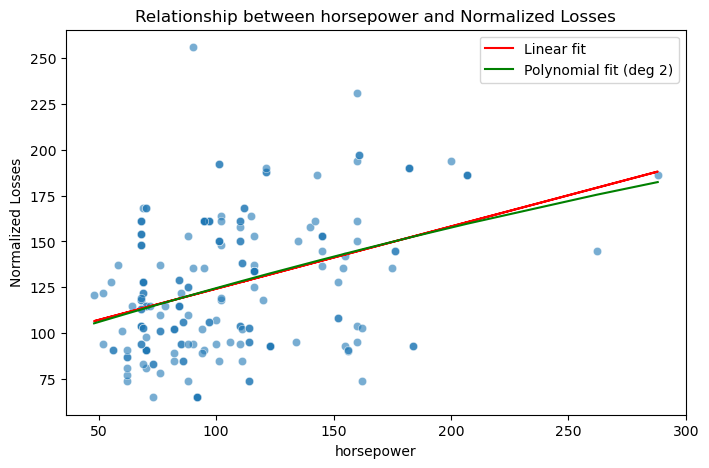

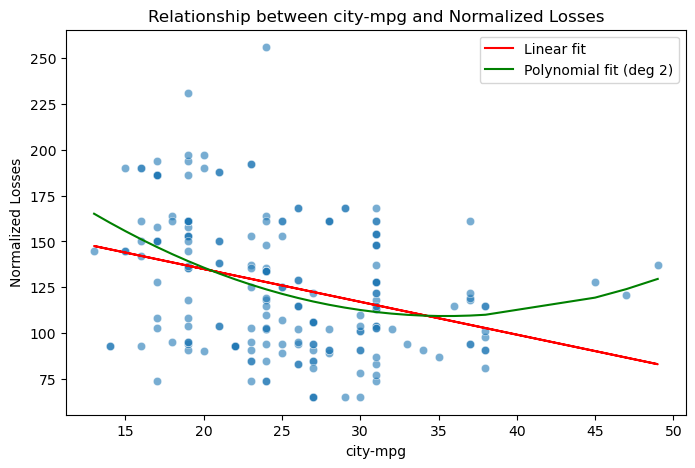

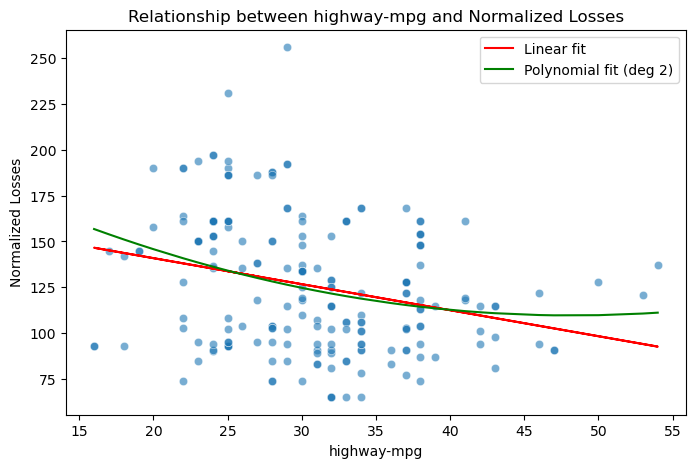

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ensure columns are numeric and drop missing values
cols = ['normalized-losses', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Variables to analyze
features = ['engine-size', 'horsepower', 'city-mpg', 'highway-mpg']

for feature in features:
    X = clean_df[[feature]].values
    y = clean_df['normalized-losses'].values
    
    # Scatter plot
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=feature, y='normalized-losses', data=clean_df, alpha=0.6)
    
    # Fit a linear regression line for comparison
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred_linear = lr.predict(X)
    plt.plot(clean_df[feature], y_pred_linear, color='red', label='Linear fit')
    
    # Fit a polynomial regression (degree 2) for nonlinear pattern
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)
    # Sort for smooth plotting
    sorted_idx = X[:,0].argsort()
    plt.plot(clean_df[feature].iloc[sorted_idx], y_pred_poly[sorted_idx], color='green', label='Polynomial fit (deg 2)')
    
    plt.title(f'Relationship between {feature} and Normalized Losses')
    plt.xlabel(feature)
    plt.ylabel('Normalized Losses')
    plt.legend()
    plt.show()


Do certain engine types or configurations lead to higher losses?

Average Normalized Losses by Engine Type:
engine-type
dohcv    186.000000
l        157.666667
rotor    150.000000
dohc     144.250000
ohcv     135.326923
ohc      121.082770
ohcf     111.000000
Name: normalized-losses, dtype: float64

Average Normalized Losses by Number of Cylinders:
num-of-cylinders
2     150.000000
3     121.000000
4     119.523585
5     129.909091
6     160.302083
8     121.400000
12    145.000000
Name: normalized-losses, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_14592\3888526379.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine_group.index, y=engine_group.values, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_14592\3888526379.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cylinder_group.index.astype(int), y=cylinder_group.values, palette='magma')


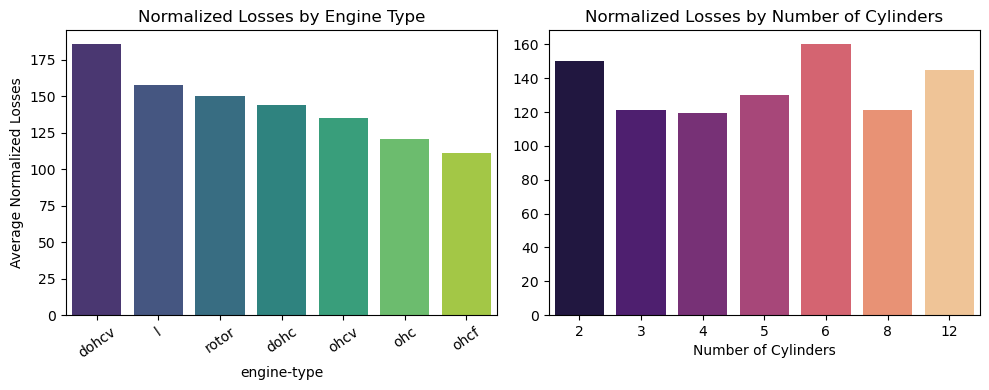

In [36]:
# Group by engine-type and compute mean normalized-losses
engine_group = clean_df.groupby('engine-type')['normalized-losses'].mean().sort_values(ascending=False)
print("Average Normalized Losses by Engine Type:")
print(engine_group)

# Group by num-of-cylinders
cylinder_group = clean_df.groupby('num-of-cylinders')['normalized-losses'].mean().sort_index()
print("\nAverage Normalized Losses by Number of Cylinders:")
print(cylinder_group)

# Optional: Plot the results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=engine_group.index, y=engine_group.values, palette='viridis')
plt.title('Normalized Losses by Engine Type')
plt.ylabel('Average Normalized Losses')
plt.xticks(rotation=35)
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.barplot(x=cylinder_group.index.astype(int), y=cylinder_group.values, palette='magma')
plt.title('Normalized Losses by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.tight_layout()
plt.show()


Correlation with Normalized Losses:
 normalized-losses    1.000000
engine-size          0.223756
horsepower           0.375946
city-mpg            -0.327853
highway-mpg         -0.273456
Name: normalized-losses, dtype: float64


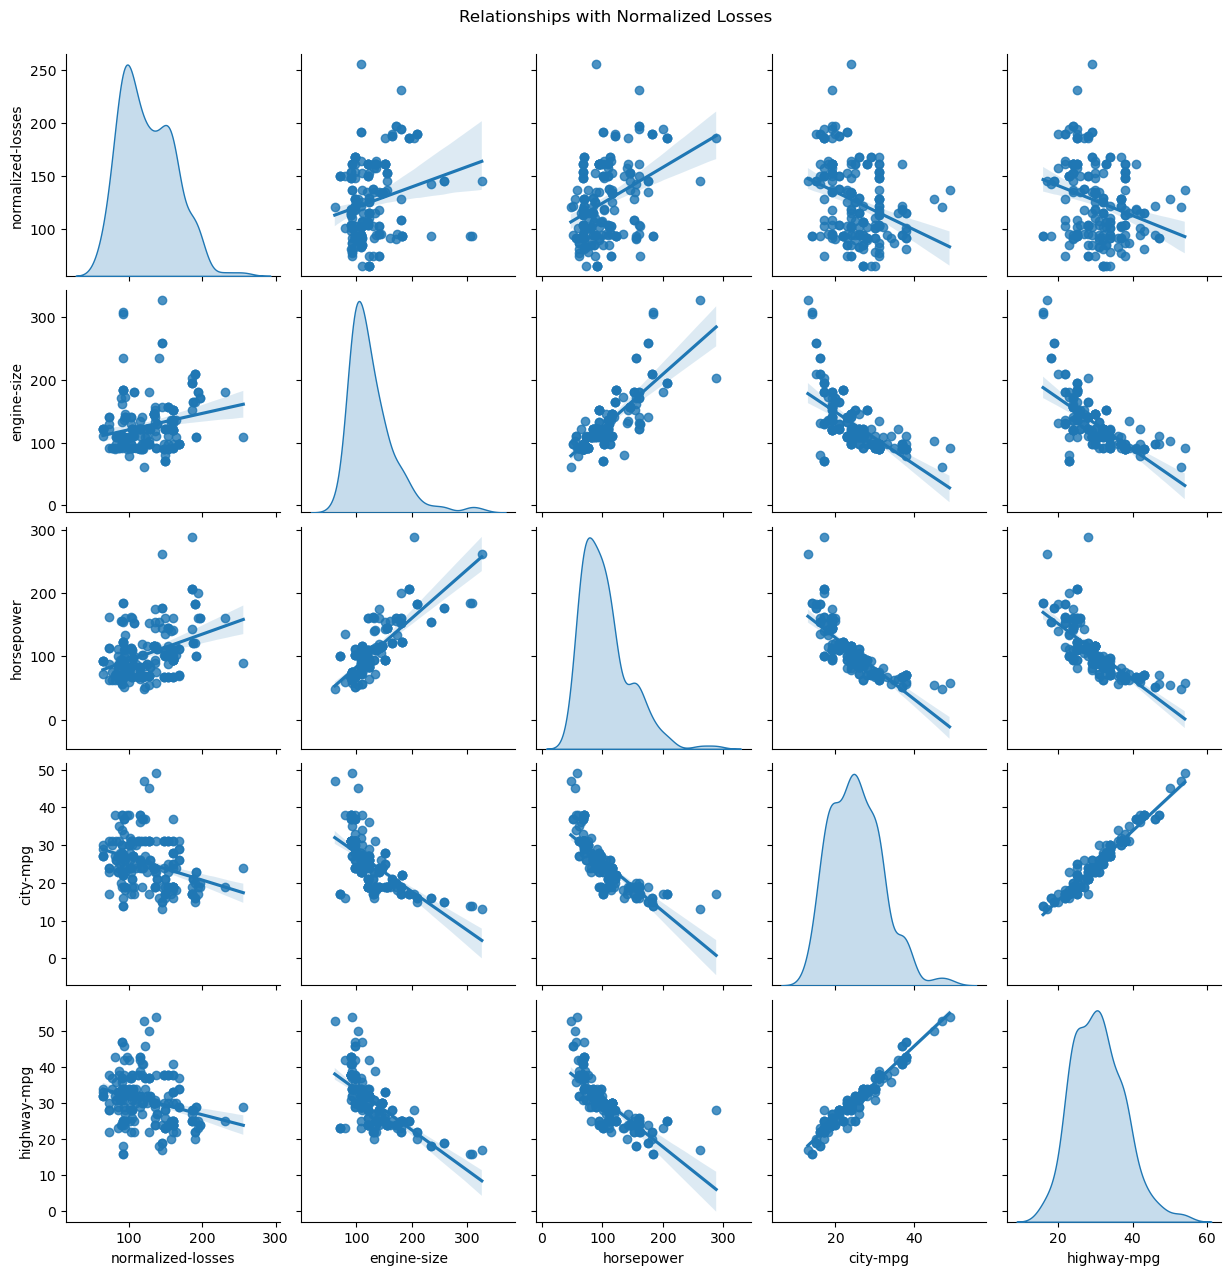

In [37]:
# Calculate correlation
correlations = clean_df[cols].corr()
print("Correlation with Normalized Losses:\n", correlations['normalized-losses'])

# Optional: Visualize with scatter plots
sns.pairplot(clean_df[cols], kind='reg', diag_kind='kde')
plt.suptitle("Relationships with Normalized Losses", y=1.02)
plt.show()


How does the drive wheel configuration affect insurance risk?

Average Normalized Losses by Drive Wheel Type:
 drive-wheels
rwd    143.305921
fwd    115.902083
4wd    106.000000
Name: normalized-losses, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_14592\4145279124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drive_loss_avg.index, y=drive_loss_avg.values, palette='coolwarm')


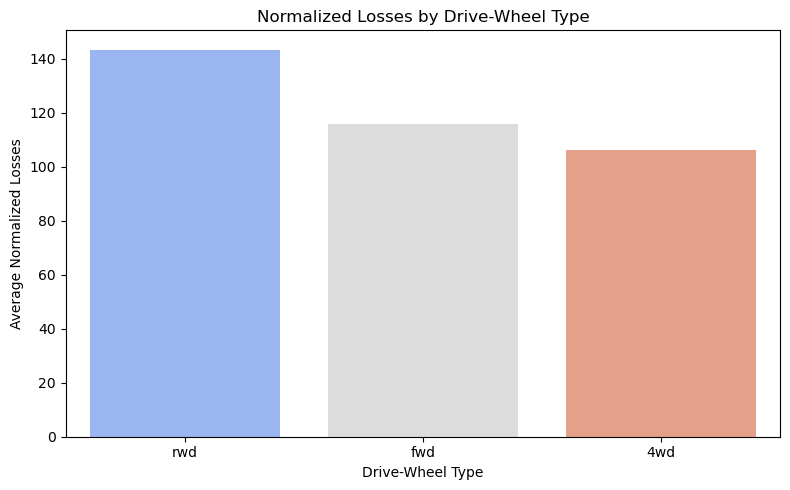

In [39]:
# Group by drive-wheels and compute average normalized losses
drive_loss_avg = df.groupby('drive-wheels')['normalized-losses'].mean().sort_values(ascending=False)
print("Average Normalized Losses by Drive Wheel Type:\n", drive_loss_avg)

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(x=drive_loss_avg.index, y=drive_loss_avg.values, palette='coolwarm')
plt.title("Normalized Losses by Drive-Wheel Type")
plt.ylabel("Average Normalized Losses")
plt.xlabel("Drive-Wheel Type")
plt.tight_layout()
plt.show()


Data Quality and Distribution Insights

What is the distribution of normalized losses across the dataset?

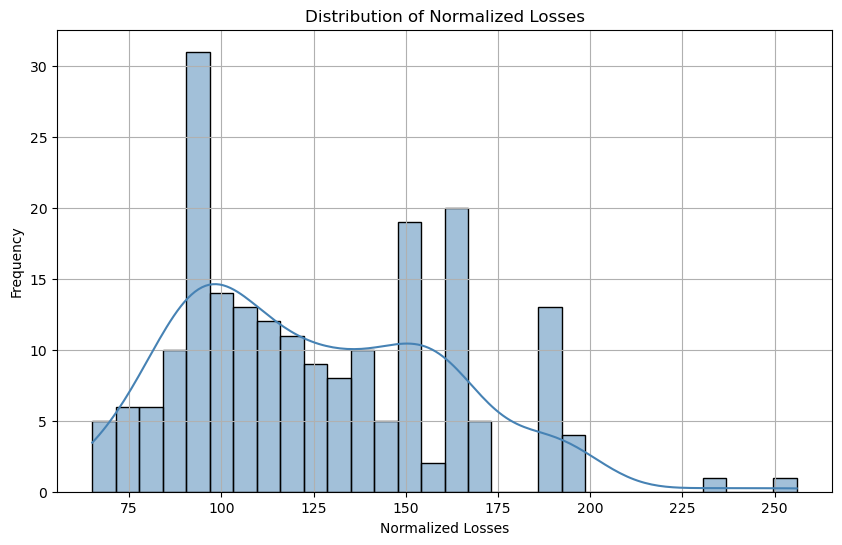

Skewness of normalized-losses: 0.57


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Ensure data is numeric and drop missing

losses = df['normalized-losses'].dropna()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(losses, kde=True, bins=30, color='steelblue')
plt.title('Distribution of Normalized Losses')
plt.xlabel('Normalized Losses')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Skewness value
print(f"Skewness of normalized-losses: {skew(losses):.2f}")


Do outliers in certain features correspond to higher insurance losses?

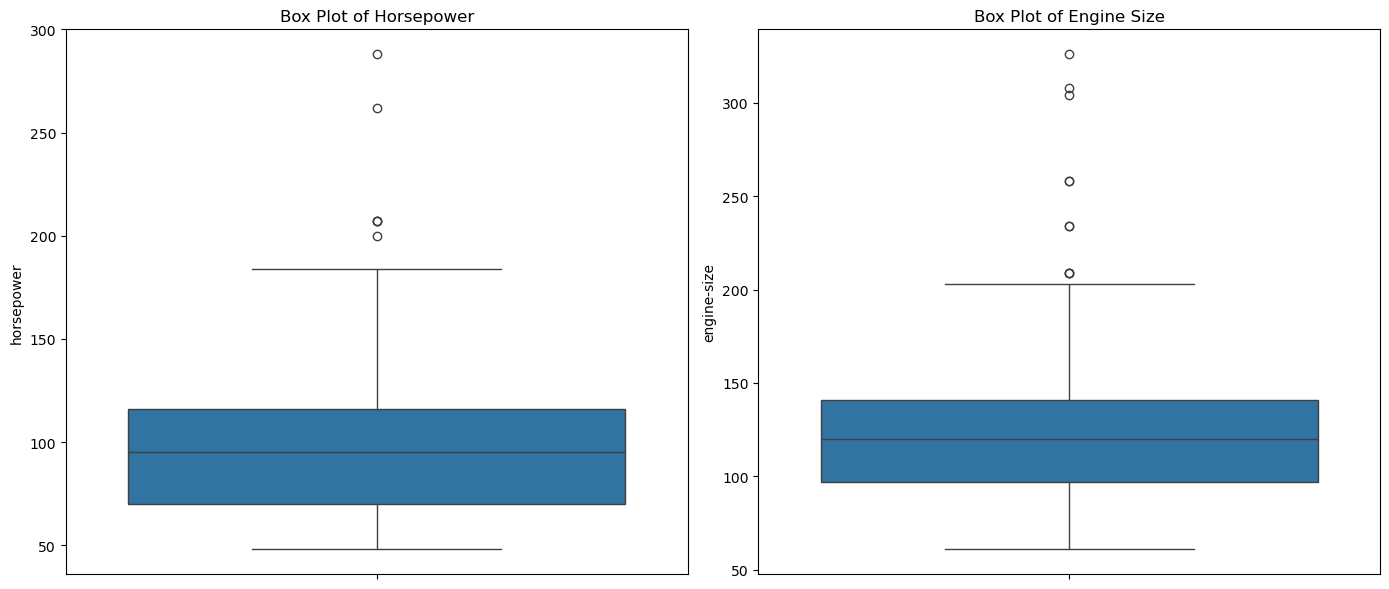

In [44]:
plt.figure(figsize=(14, 6))

# Box plot for horsepower
plt.subplot(1, 2, 1)
sns.boxplot(y=df['horsepower'])
plt.title('Box Plot of Horsepower')

# Box plot for engine-size
plt.subplot(1, 2, 2)
sns.boxplot(y=df['engine-size'])
plt.title('Box Plot of Engine Size')

plt.tight_layout()
plt.show()


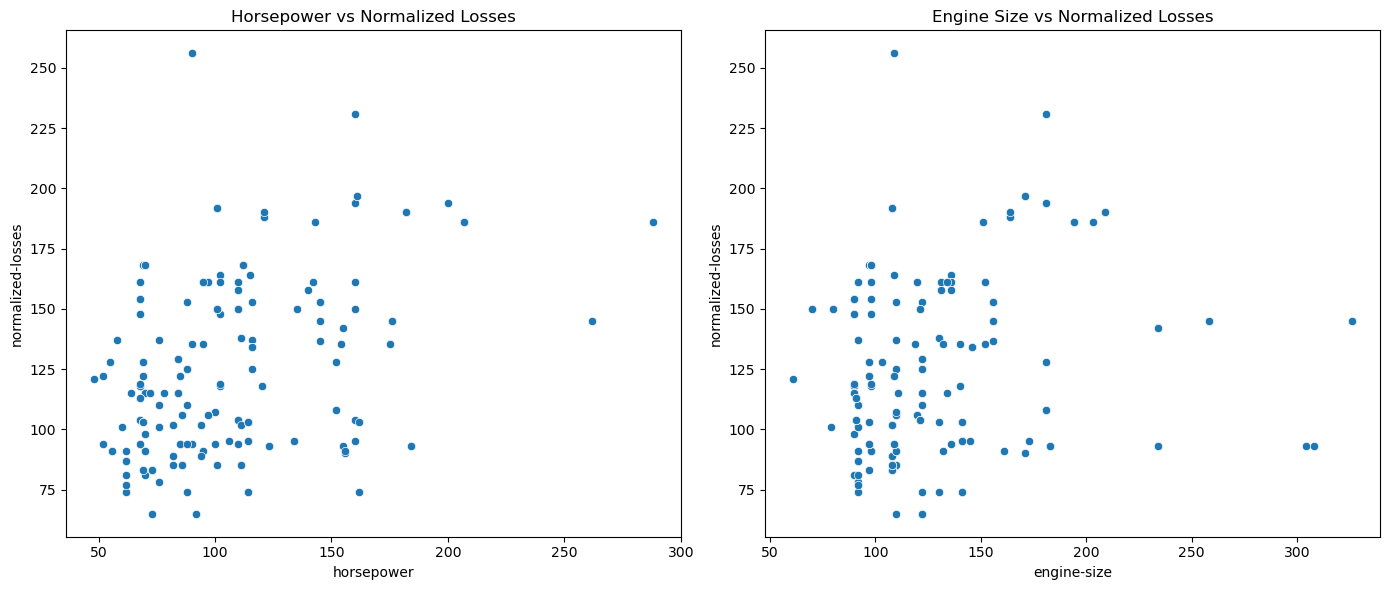

In [45]:
plt.figure(figsize=(14, 6))

# Horsepower vs Normalized Losses
plt.subplot(1, 2, 1)
sns.scatterplot(x='horsepower', y='normalized-losses', data=df)
plt.title('Horsepower vs Normalized Losses')

# Engine Size vs Normalized Losses
plt.subplot(1, 2, 2)
sns.scatterplot(x='engine-size', y='normalized-losses', data=df)
plt.title('Engine Size vs Normalized Losses')

plt.tight_layout()
plt.show()


Comparative and Group Analysis

 Which car brands have the highest and lowest average insurance losses?

make
bmw              190.000000
porsche          186.000000
peugot           161.000000
audi             161.000000
mitsubishi       147.769231
jaguar           145.000000
alfa-romero      137.083333
mercury          135.250000
nissan           135.166667
dodge            133.444444
plymouth         130.071429
saab             127.000000
mazda            122.882353
isuzu            120.062500
renault          113.125000
volkswagen       112.166667
toyota           109.687500
honda            103.000000
chevrolet        100.000000
mercedes-benz     99.125000
subaru            92.250000
volvo             91.454545
Name: normalized-losses, dtype: float64


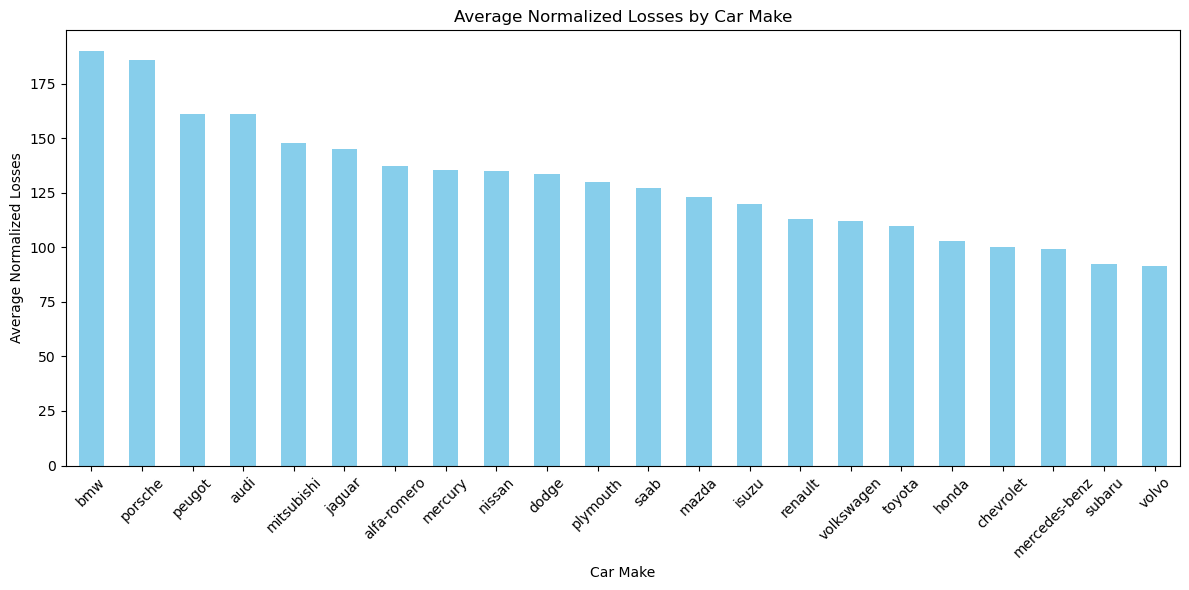

In [48]:
# Group by 'make' and calculate mean of 'normalized-losses'
avg_losses_by_make = df.groupby('make')['normalized-losses'].mean().sort_values(ascending=False)

# Display the result
print(avg_losses_by_make)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
avg_losses_by_make.plot(kind='bar', color='skyblue')
plt.title('Average Normalized Losses by Car Make')
plt.ylabel('Average Normalized Losses')
plt.xlabel('Car Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


How does aspiration type (standard vs. turbo) influence insurance losses?

aspiration
turbo    127.209459
std      125.278274
Name: normalized-losses, dtype: float64


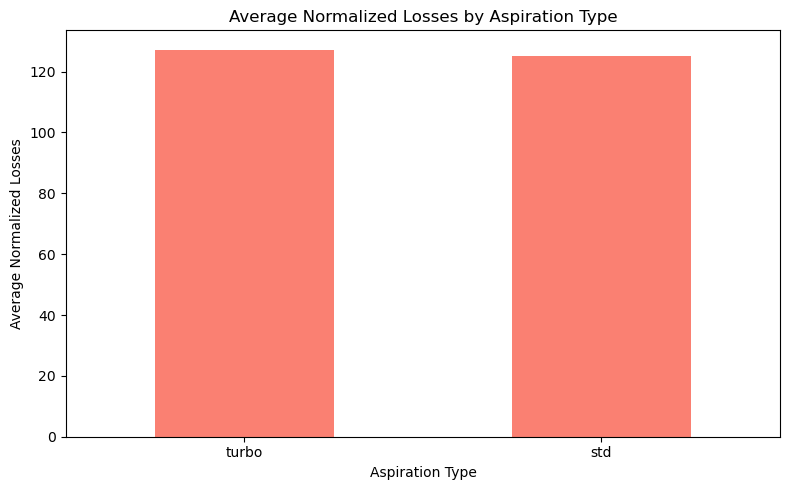

In [50]:
# Group by aspiration type and calculate mean normalized losses
avg_losses_by_aspiration = df.groupby('aspiration')['normalized-losses'].mean().sort_values(ascending=False)

# Display the results
print(avg_losses_by_aspiration)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
avg_losses_by_aspiration.plot(kind='bar', color='salmon')
plt.title('Average Normalized Losses by Aspiration Type')
plt.xlabel('Aspiration Type')
plt.ylabel('Average Normalized Losses')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Is there a relationship between fuel efficiency and insurance losses?

Correlation between normalized losses and city-mpg: -0.327853247985801
Correlation between normalized losses and highway-mpg: -0.2734560350514002


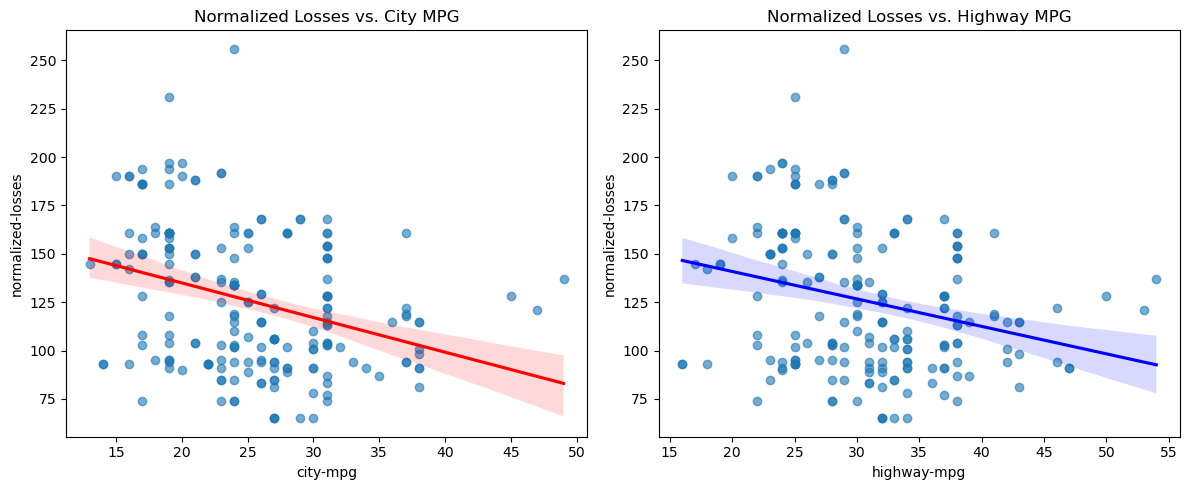

In [52]:
correlation_city = df['normalized-losses'].corr(df['city-mpg'])
correlation_highway = df['normalized-losses'].corr(df['highway-mpg'])

print("Correlation between normalized losses and city-mpg:", correlation_city)
print("Correlation between normalized losses and highway-mpg:", correlation_highway)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# City-mpg plot
plt.subplot(1, 2, 1)
sns.regplot(x='city-mpg', y='normalized-losses', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Normalized Losses vs. City MPG')

# Highway-mpg plot
plt.subplot(1, 2, 2)
sns.regplot(x='highway-mpg', y='normalized-losses', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title('Normalized Losses vs. Highway MPG')

plt.tight_layout()
plt.show()


Do cars with higher prices have higher insurance losses?

Correlation between normalized losses and price: 0.2734107511615321


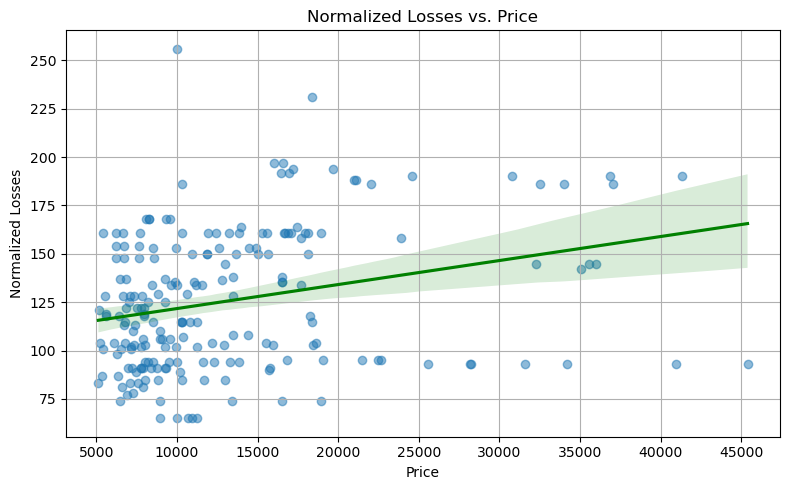

In [70]:
correlation_price = df['normalized-losses'].corr(df['price'])
print("Correlation between normalized losses and price:", correlation_price)
plt.figure(figsize=(8, 5))
sns.regplot(x='price', y='normalized-losses', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title('Normalized Losses vs. Price')
plt.xlabel('Price')
plt.ylabel('Normalized Losses')
plt.grid(True)
plt.tight_layout()
plt.show()


Strategic Insights for Insurance Decision-Making

Can we identify a profile for high-risk vehicles?

     body-style drive-wheels  engine-size  horsepower  normalized-losses
2       hardtop          fwd    97.000000   69.000000         168.000000
6     hatchback          rwd   136.000000  141.526316         164.802632
1   convertible          rwd   166.800000  140.000000         147.600000
9         sedan          rwd   165.000000  129.222222         139.222222
3       hardtop          rwd   187.571429  152.714286         137.142857
5     hatchback          fwd   105.816327   85.000000         123.127551
7         sedan          4wd   117.333333  102.666667         122.666667
4     hatchback          4wd   119.500000  116.500000         122.000000
12        wagon          rwd   144.444444  116.777778         116.666667
8         sedan          fwd   109.947368   86.631579         112.912281


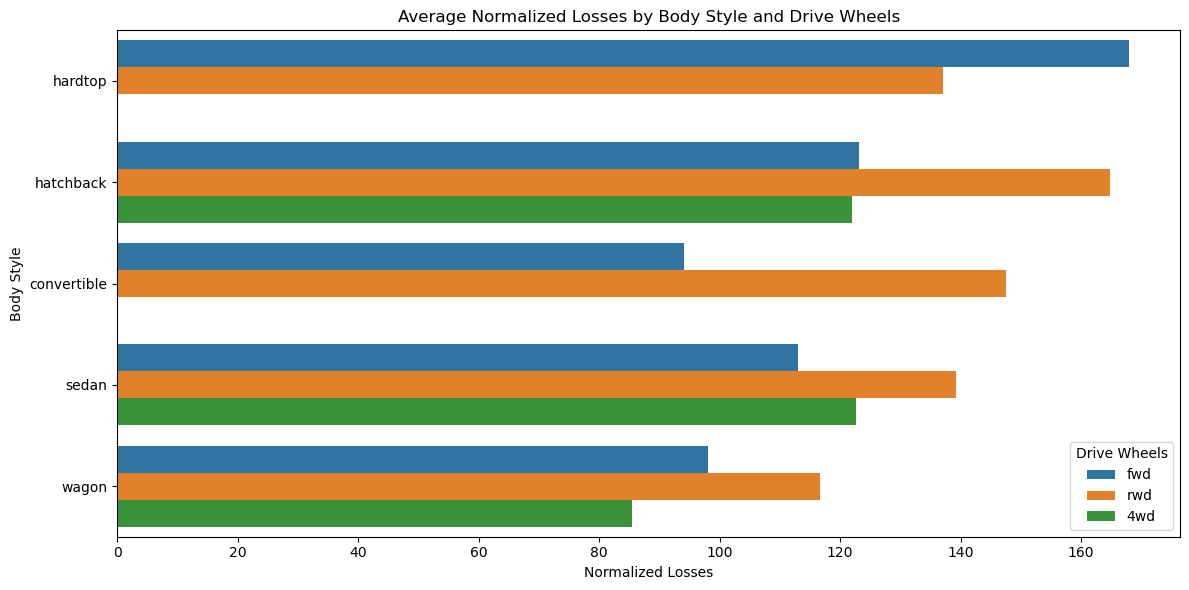

In [72]:
# Group by multiple features and calculate mean normalized-losses
risk_profile = df.groupby(['body-style', 'drive-wheels'])[['engine-size', 'horsepower', 'normalized-losses']].mean().reset_index()

# Sort by normalized-losses to find high-risk combinations
high_risk_cars = risk_profile.sort_values(by='normalized-losses', ascending=False)

# Display top combinations
print(high_risk_cars.head(10))
plt.figure(figsize=(12, 6))
sns.barplot(x='normalized-losses', y='body-style', hue='drive-wheels', data=high_risk_cars)
plt.title('Average Normalized Losses by Body Style and Drive Wheels')
plt.xlabel('Normalized Losses')
plt.ylabel('Body Style')
plt.legend(title='Drive Wheels')
plt.tight_layout()
plt.show()


What vehicle attributes should insurers consider when pricing premiums?

In [74]:
# Select numeric columns
numerical_cols = ['normalized-losses', 'engine-size', 'horsepower', 'curb-weight', 
                  'price', 'city-mpg', 'highway-mpg']

# Compute correlations
correlations = df[numerical_cols].corr()['normalized-losses'].sort_values(ascending=False)

print("Correlation with normalized-losses:\n", correlations)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Drop rows with missing values for simplicity
df_model = df.dropna(subset=numerical_cols + ['body-style', 'drive-wheels', 'fuel-type'])

# Encode categorical features
df_model_encoded = df_model.copy()
for col in ['body-style', 'drive-wheels', 'fuel-type']:
    df_model_encoded[col] = LabelEncoder().fit_transform(df_model_encoded[col])

# Prepare data
X = df_model_encoded.drop('normalized-losses', axis=1)[['engine-size', 'horsepower', 'curb-weight', 
                                                        'price', 'city-mpg', 'highway-mpg', 
                                                        'body-style', 'drive-wheels', 'fuel-type']]
y = df_model_encoded['normalized-losses']

# Fit random forest
model = RandomForestRegressor(random_state=0)
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", importances)


Correlation with normalized-losses:
 normalized-losses    1.000000
horsepower           0.375946
price                0.273411
engine-size          0.223756
curb-weight          0.205660
highway-mpg         -0.273456
city-mpg            -0.327853
Name: normalized-losses, dtype: float64
Feature Importances:
 curb-weight     0.181914
horsepower      0.177842
city-mpg        0.156658
engine-size     0.128660
price           0.110935
highway-mpg     0.100690
body-style      0.078511
drive-wheels    0.060988
fuel-type       0.003801
dtype: float64


Are there clusters of vehicles with similar risk profiles?

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


         normalized-losses  engine-size  horsepower  curb-weight         price
cluster                                                                       
0               141.319444   145.069444  126.208333  2940.430556  16544.097222
1               112.843220   102.152542   79.635593  2199.110169   8396.644068
2               150.866667   234.466667  191.333333  3512.333333  34255.600000


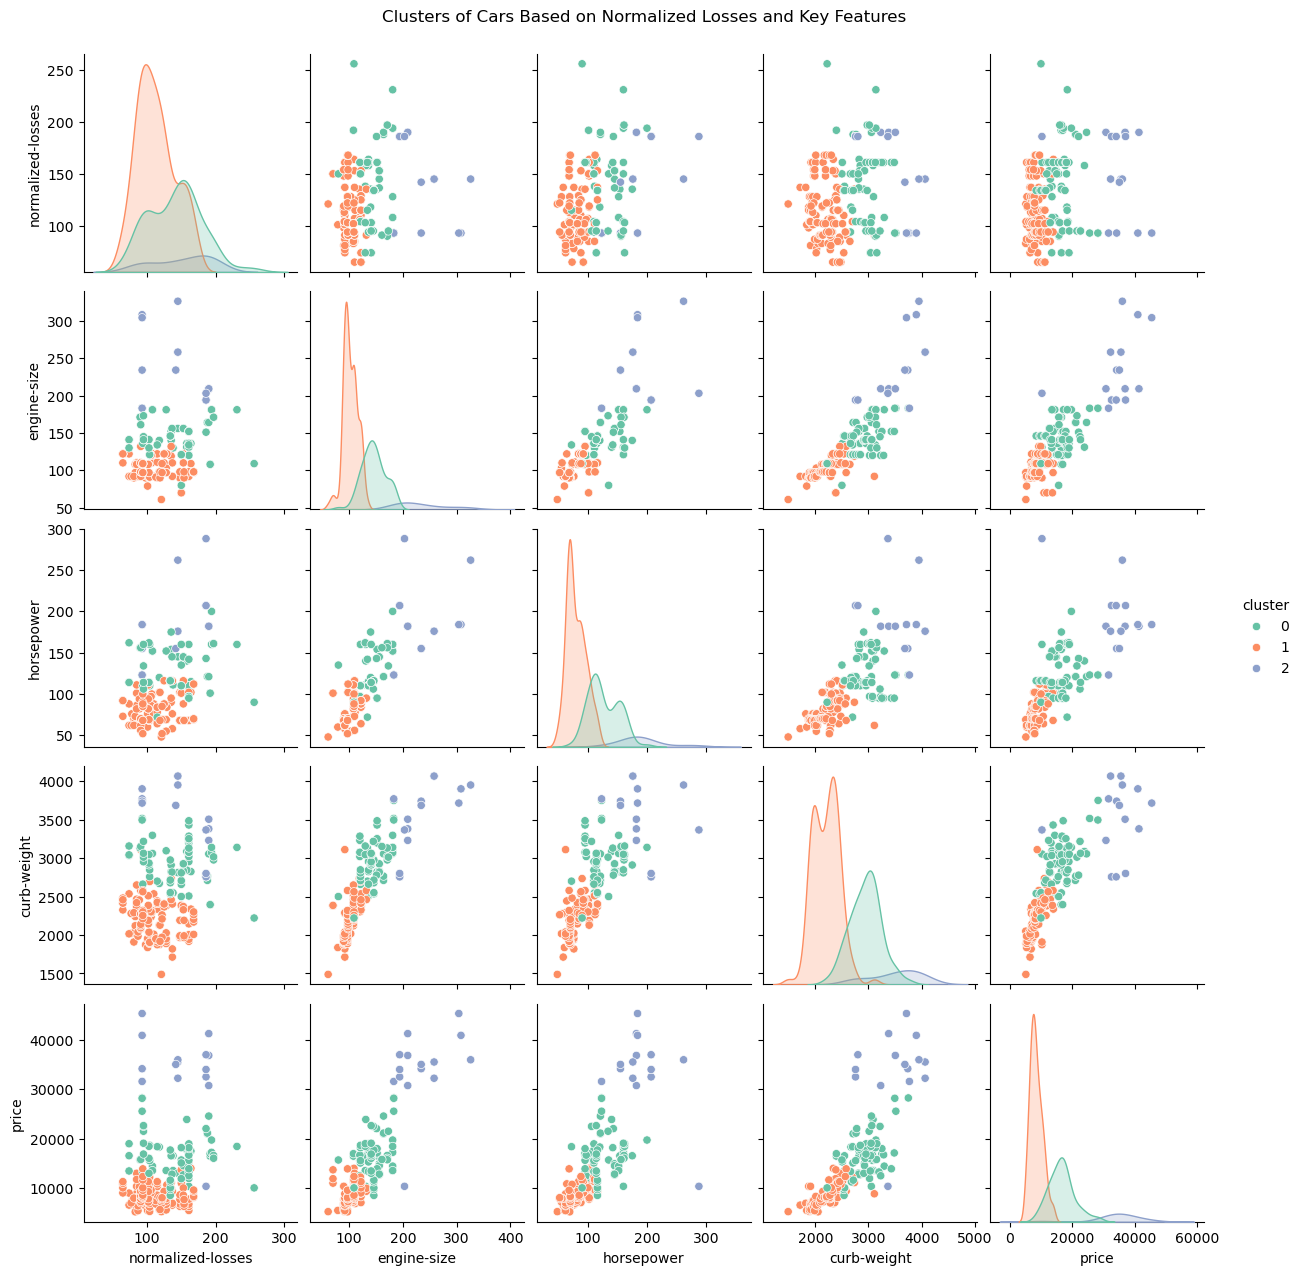

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Select features relevant to insurance loss patterns
features = ['normalized-losses', 'engine-size', 'horsepower', 'curb-weight', 'price']

# Drop rows with missing values
df_cluster = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)
# Add the cluster label back to original dataframe
df_with_clusters = df.copy()
df_with_clusters['cluster'] = pd.NA
df_with_clusters.loc[df_cluster.index, 'cluster'] = df_cluster['cluster']

# Group by cluster to find average values
cluster_summary = df_with_clusters.groupby('cluster')[features].mean()
print(cluster_summary)
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_cluster, hue='cluster', palette='Set2')
plt.suptitle('Clusters of Cars Based on Normalized Losses and Key Features', y=1.02)
plt.show()
